**Ridge Regression - Sklearn (Regularization)**

**Import Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import math
import time
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.linear_model import Lasso
from sklearn.datasets import make_regression, load_diabetes
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix, mean_absolute_error, explained_variance_score

**Load Dataset**

In [2]:
data = load_diabetes()
print(data.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [3]:
X = data.data
y = data.target
print(X.shape), print(y.shape)

(442, 10)
(442,)


(None, None)

In [4]:
print(X[:5])
print(y[:5])

[[ 0.03807591  0.05068012  0.06169621  0.02187239 -0.0442235  -0.03482076
  -0.04340085 -0.00259226  0.01990749 -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 -0.02632753 -0.00844872 -0.01916334
   0.07441156 -0.03949338 -0.06833155 -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 -0.00567042 -0.04559945 -0.03419447
  -0.03235593 -0.00259226  0.00286131 -0.02593034]
 [-0.08906294 -0.04464164 -0.01159501 -0.03665608  0.01219057  0.02499059
  -0.03603757  0.03430886  0.02268774 -0.00936191]
 [ 0.00538306 -0.04464164 -0.03638469  0.02187239  0.00393485  0.01559614
   0.00814208 -0.00259226 -0.03198764 -0.04664087]]
[151.  75. 141. 206. 135.]


In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=45)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [6]:
L = LinearRegression()
L.fit(X_train,y_train)

LinearRegression()

In [7]:
print(L.coef_)
print(L.intercept_)

[  23.45465406 -247.42747406  492.1087518   329.35876431 -970.79723039
  573.54295519  182.42162368  255.92168168  794.21609282   89.32249214]
152.13623331746496


In [8]:
y_pred = L.predict(X_test)
print(y_pred)

[226.51848598 157.46329293  89.86172648 207.92043638 175.27464325
 146.48196423 131.11782081  97.37923306 102.94499199 181.69238112
 237.97531281 134.74726724 189.44205531  59.92873145 179.98730177
 117.78561801 120.30969646 126.66229732 165.19425279 147.78162151
 145.4387221  124.41329425  51.96058948 227.75415791 218.10133602
 129.82865712 160.13538356 201.17200936 184.84143661  68.90970369
 237.00685674  58.17158783 154.39979192 119.15941043 234.0319742
 172.80143208 139.94775146 169.99263492 214.59145267 220.47784209
 128.98250674 186.20992149 162.87053192 179.77640803 107.76869146
 249.52929292 140.92355113  32.74846723 177.96181001 145.76575416
 291.96774118 125.71074727 107.27012754 156.10001536 115.93096259
 160.35263722 229.48001183 173.38808746 159.87971544 123.05044568
  88.54923021 122.87202843 169.12811086 101.97744379 282.75789855
 148.0039501  164.73180431 157.31740851 232.69907212 121.1235174
  95.65610456 186.24330439  87.52788315 160.95859575 242.37311196
 149.1371139

In [9]:
print("R2 score : ", r2_score(y_test,y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test,y_pred)))

R2 score :  0.5188113124539249
RMSE :  48.72713760953253


In [10]:
R = Ridge(alpha=100000)
R.fit(X_train, y_train)

Ridge(alpha=100000)

In [11]:
print(R.coef_)
print(R.intercept_)

[ 0.00260126  0.00057066  0.00776597  0.0060976   0.00233864  0.00184724
 -0.00513942  0.0052716   0.00734598  0.00528629]
151.83287930791352


In [12]:
y_pred1 = R.predict(X_test)
print(y_pred1)

[151.83477277 151.83386923 151.8310826  151.83398786 151.83402552
 151.83280279 151.83242967 151.83122138 151.83147434 151.83410881
 151.83553312 151.83198246 151.8340554  151.83101672 151.83358331
 151.83210611 151.83216683 151.83301964 151.83334724 151.83265977
 151.8314865  151.83308634 151.83108108 151.8356712  151.83556837
 151.83195994 151.83435617 151.83385905 151.83351319 151.83092694
 151.83474926 151.83064361 151.83273659 151.83195511 151.83431221
 151.83318651 151.83261999 151.83398335 151.834545   151.83517029
 151.83221961 151.83392524 151.83281468 151.83334573 151.83170554
 151.83557762 151.83260112 151.83061767 151.83371664 151.83197648
 151.83526054 151.83180245 151.83227785 151.83219081 151.83172007
 151.83356452 151.83549474 151.83481516 151.83249352 151.83110297
 151.83081262 151.83358502 151.83275059 151.83075788 151.83651791
 151.8317356  151.83312968 151.83383699 151.83419181 151.83161472
 151.83061863 151.83392831 151.83146232 151.83349685 151.8346054
 151.832524

In [13]:
print("R2 score : ", r2_score(y_test,y_pred1))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred1)))

R2 score :  -0.00042490200441935855
RMSE :  70.25956272917782


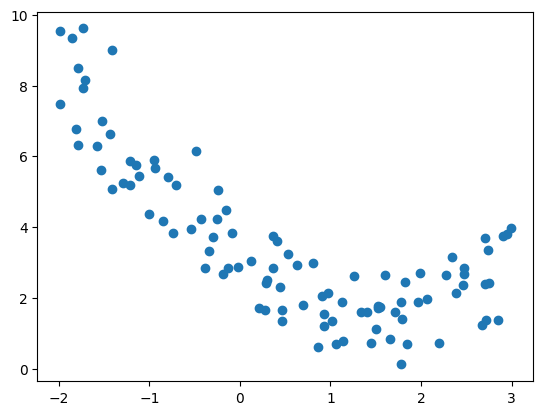

In [14]:
m = 100
x1 = 5 * np.random.rand(m, 1) - 2
x2 = 0.7 * x1 ** 2 - 2 * x1 + 3 + np.random.randn(m, 1)

plt.scatter(x1, x2)
plt.show()

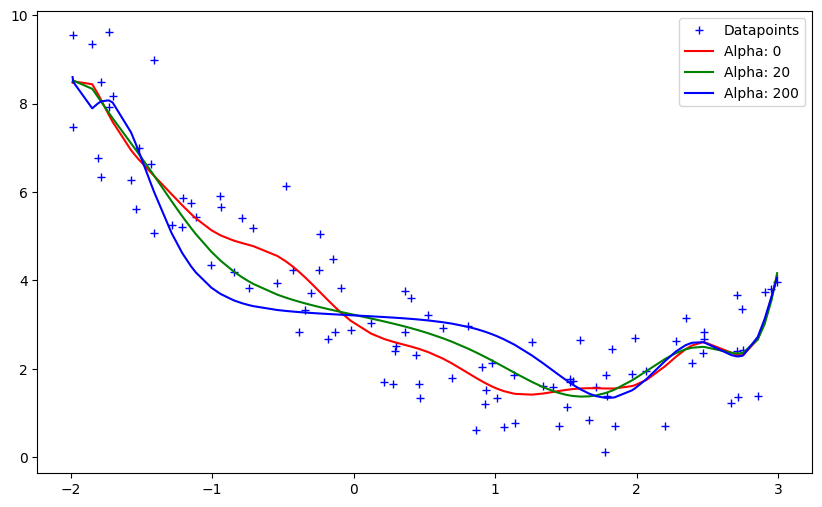

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

def get_preds_ridge(x1, x2, alpha):
    model = Pipeline([
        ('poly_feats', PolynomialFeatures(degree=16)),
        ('ridge', Ridge(alpha=alpha))
    ])
    model.fit(x1, x2)
    return model.predict(x1)

alphas = [0, 20, 200]
cs = ['r', 'g', 'b']

plt.figure(figsize=(10, 6))
plt.plot(x1, x2, 'b+', label='Datapoints')

for alpha, c in zip(alphas, cs):
    preds = get_preds_ridge(x1, x2, alpha)
    # Plot
    plt.plot(sorted(x1[:, 0]), preds[np.argsort(x1[:, 0])], c, label='Alpha: {}'.format(alpha))

plt.legend()
plt.show()